# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2025

# § Week 1 - Optimization

## Example: Oil spill

> An oil spill has contaminated 200 miles of Alaskan shoreline. The
> shipping company responsible for the accident has been given 14 days
> to clean up the shoreline, after which it will be required to pay a
> fine of \$10,000 per day.

For simplicity, let’s assume that the fine depends on fractional days. For example, if
the work is completed in 15.5 days, we’ll suppose that the company would
pay a fine of

$$1.5 \cdot 10000 = 15000.$$

> Cleanup crews can be hired, and each crew cleans 5 miles of beach per
> week.
>
> There is one local cleanup crew available at a cost of \$500 per
> day.
>
> Additional non-local crews can be hired. The hire of each non-local
> crew incurs an \\\$18,000 one-time travel cost. These additional crews
> work for \\$800 per day for each crew (and each crew has the same
> cleanup rate of 5 miles of beach per week).

Relevant parameters:

-   $m$ = miles cleaned per crew per week = $5$
-   $f$ = fine charged per day = \\$$10,000$
-   $TC$ = travel costs per outside crew = \\\$$18,000$

The main choice that the company must make is: “how many outside crews
to hire?”

-   $n$ = \# of outside crews to hire

According to the background description, there are a number of
quantities that depend on this choice:

-   $t$ = \# of days for complete cleanup
-   $F$ = fine to be paid
-   $C_{crew}$ = payments to cleanup crews
-   $C_{tot}$ = total cleanup cost = $F + C_{crew}$

Let’s give **mathematical expressions** for these quantities:

- $t = 200\cdot\dfrac{1}{n+1} \cdot \dfrac{7}{m}$.

(Indeed, $n+1$ crews working at a rate of $m$ miles per day will clean
200 miles of beach in the indicated number of days)

-   $F= \begin{cases} 0 & \text{if $t<14$} \\ f\cdot(t-14) & \text{if $t
    \ge 14$} \end{cases}$

(Indeed, no fine if work is completed within two weeks; otherwise, the
fine is given by the indicated formula)

-   $C_{crew} = 500\cdot t + 800\cdot t\cdot n + TC\cdot n$

-   $C_{tot} = F + C_{crew}$

Now let’s give `python` code for computing these quantities.

Note that we use the parameter values as *default values* for some of
the arguments of the *crew_cost* and *cost* functions.

In [9]:
class OilSpillCleanup:
    def __init__(self,cleanup_rate=5.0/7,travelcosts=18000,miles=200,fine_per_day=10000):
        self.miles = miles                
        self.cleanup_rate = cleanup_rate   
        self.travelcosts = travelcosts                      
        self.fine_per_day = fine_per_day
       
    def report_params(self):
        # return a dictionary describing the parameters for this instance of the class
        return { "miles to clean": self.miles,
                 "cleanup rate": self.cleanup_rate,
                 "transport costs": self.travelcosts,
                 "fine per day": self.fine_per_day
               }
        
    def time(self,n): 
        # time to clean the shoreline if n external crews are hired
        return self.miles/((n+1)*self.cleanup_rate)

    def fine(self,t): 
        # The total fine imposed. Depends on:
        # t = # of days for complete cleanup 
        return 0 if (t<14) else self.fine_per_day*(t-14)

    def crew_costs(self,n):
        # cost in payments to crews. Depends on
        # n = number of non-local crews hired
        t=self.time(n) # time for cleanup
        return 500*t + 800*t*n + self.travelcosts*n

    def cost(self,n):
        # total expenses incurred for hire of n external crews
        t=self.time(n)
        return self.fine(self.time(n)) + self.crew_costs(n) 

### Let’s first just make a table of results

In our table, the rows will contain the values of the various quantities
for possible values of $n$, the number of “outside” cleanup crews hired.

For this, we are going to use python’s [**Pandas**
module](https://pandas.pydata.org/docs/index.html). We’ll use the
“DataFrame” data structure (which is a bit like a python dictionary for
which the keys are the column headers and the values are the column
data).

In [10]:
import pandas as pd

## The following overrides the usual display formatting of floating point numbers. 
## It is just an aesthetic choice...

pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [11]:
from pprint import pprint

# define an instance of the OilSpillCleanup class, with the default arguments.
c = OilSpillCleanup()

pprint(c.report_params())

{'cleanup rate': 0.7142857142857143,
 'fine per day': 10000,
 'miles to clean': 200,
 'transport costs': 18000}


In [12]:
# and define a function of two arguments:
# c, a class of type OilSpillCleanup, and
# crew_range, a list of integers, to be used as the "number of external crews hired"
#             crew_range defaults to the list [0,1,...,24]
#
def oil_spill_costs(c, crew_range=range(0,25)):
    return pd.DataFrame(
            {'#external crews'      : crew_range,
             'cost'   : map( lambda n: c.cost(n) , crew_range),
             'days'   : map( lambda n: c.time(n) , crew_range),
             'fine'   : map( lambda n: c.fine(c.time(n)) , crew_range)
            },
            index=crew_range)
    

oil_spill_costs(c)  ## Compute use the *default* parameter values.

,#external crews,cost,days,fine
0,0,"2,800,000.00",280.00,"2,660,000.00"
1,1,"1,460,000.00",140.00,"1,260,000.00"
2,2,"1,025,333.33",93.33,"793,333.33"
3,3,"817,000.00",70.00,"560,000.00"
4,4,"699,200.00",56.00,"420,000.00"
5,5,"626,666.67",46.67,"326,666.67"
6,6,"580,000.00",40.00,"260,000.00"
7,7,"549,500.00",35.00,"210,000.00"
8,8,"529,777.78",31.11,"171,111.11"
9,9,"517,600.00",28.00,"140,000.00"


We can of course just scan the columns with our eyes to see where the
costs appear to be minimized. In real applications, the tables might be 
much larger, so we demonstrate how to use *pandas* API-functions to get results from this table.

In the terminology of *pandas*, we’ll extract the *costs* column
`df['cost']` of the “dataframe” `df` as a *series*, and then use the
`idxmin` method to find the *index* `j` at which the costs are
minimized. Finally, the loc property of `df` allows to select the data
`df.loc[j]` in the row with index label `j`.

In [13]:
def minimize_costs(c,crew_range=range(0,25)):
    ## make the data-frame 
    costs_df = oil_spill_costs(c,crew_range) 
    ## find the index of the data-frame entry with minimal costs
    min_index = costs_df['cost'].idxmin()
    ## return the corresponding data-frame entry  
    return costs_df.loc[min_index]    

def report_minimal_costs(c,crew_range=range(0,25)):
    r = minimize_costs(c,crew_range)
    return "\n".join([f"For n in {crew_range}, and with these parameters:",
                      "",
                      #pprint(c.report_params()),
                      f"the total costs are minimized by hiring n = {r['#external crews']} external crews.",
                      "Here are the details:",
                      "",
                      str(r)]) + "\n"


In [14]:
## c is the class obtained above via OilSpillCleanup()
##
print(report_minimal_costs(c))

For n in range(0, 25), and with these parameters:

the total costs are minimized by hiring n = 11.0 external crews.
Here are the details:

#external crews        11.00
cost              508,333.33
days                   23.33
fine               93,333.33
Name: 11, dtype: float64



From the preceding calculation, it appears that the cost is minimized by
hiring $n=11$ outside crews. With that number of crews, cleanup takes
slightly more than 3 weeks with a total cost of \\\$508K (including a
fine of \\\$93K).

Below, we’ll use some calculus to confirm this observation!!!

Before talking about the calculus, let’s observe that it is easy to look
for minimal costs with other parameters. With this code, we need to be
careful that the range of crew sizes the code considers is large enough,
though.

Consider the following example:

In [15]:
## make a new instance of our OilSpillCleanup class, with some different parameters

c1 = OilSpillCleanup(miles=300,fine_per_day=20000,travelcosts=15000,cleanup_rate=.5)

## and look for minimal costs, first with the default range of n's, 
## and then with a slightly bigger range:

print(report_minimal_costs(c1))
print("-----------------------")
print(report_minimal_costs(c1,crew_range=range(0,35)))

## Notice! We wouldn't have seen the minimum if we had used the default crew_range...

For n in range(0, 25), and with these parameters:

the total costs are minimized by hiring n = 24.0 external crews.
Here are the details:

#external crews          24.00
cost              1,032,800.00
days                     24.00
fine                200,000.00
Name: 24, dtype: float64

-----------------------
For n in range(0, 35), and with these parameters:

the total costs are minimized by hiring n = 27.0 external crews.
Here are the details:

#external crews          27.00
cost              1,027,142.86
days                     21.43
fine                148,571.43
Name: 27, dtype: float64



-----

We now return to consideration of the “default values” of the
parameters.

Our computations so far *suggest* - but don’t *confirm* in a mathematical sense - 
the optimal number of crews to hire to minimize costs. We are going to use calculus
to confirm this number for our “default” parameter values $m = 5.0/7$,
$TC=18000$, $f=10000$, for 200 miles of coast.

Recall the formulas:

-   $t = 200\cdot \dfrac{1}{n+1} \cdot \dfrac{1}{5/7} = \dfrac{280}{n+1}$

-   $F= \begin{cases} 0 & \text{if $t<14$} \\ 10000\cdot(t-14) & \text{if $t \ge 14$} \end{cases}$

-   $C_{crew} = 500\cdot t + 800\cdot t\cdot n + 18000\cdot n$

-   $C_{tot} = F + C_{crew}$

$C_{tot}$ is expressed here as a function of both $t$ and $n$. But of
course, $t$ is determined by $n$.

We want to express $C_{tot}$ as a function only of $n$. The obstacle
here is that the fine $F$ is not expressed directly as a function of
$n$, and the best way to deal with this is to consider different cases.

We first ask the question: “how many crews would we need if we were to
clean everything up in exactly 14 days?”

For this we must solve the equation $t(n)=14$; i.e.: $$14 =
\dfrac{280}{1+n}$$

Thus, $n+1=\dfrac{280}{14}$. We find that $n+1 = 20$ so that $n=19$. In
other words, if 19 external crews are hired, work is completed in two
weeks.

Thus we see that for $n \ge 19$ we have $F = 0$ and
$C_{tot} = C_{crew}$, while for $n < 19$ $$F(n) = 10000\cdot \left
(\dfrac{280}{1+n} - 14\right)$$

The remaining expenses are the costs associated with hiring cleanup
crews. They are given by the function:

$$C_{crew}(n) = \dfrac{500 \cdot 280}{1+n}+\dfrac{800 \cdot
280}{1+n}⋅n+18000⋅n $$

And, the total cost function is given as a function of $n$ by:
$$C_{tot}(n) = \left \{ \begin{matrix} F(n) + C_{crew}(n) & n < 19 \\
C_{crew}(n) & n \ge 19\end{matrix} \right .$$

In [16]:
import sympy as sp

n = sp.Symbol("n")

def f(n): return 10000*(280/(1+n) - 14)

f(n) + c.crew_costs(n)

18000*n + 160000*n/(0.714285714285714*n + 0.714285714285714) - 140000 + 2800000/(n + 1) + 100000/(0.714285714285714*n + 0.714285714285714)

We now pause to use `python` to draw some graphs.

Of course, in python we find these functions using methods of the class
`c = OilSpillCleanup()` as follows:

-   $F(n) \leftrightarrow$ `c.fine(c.time(n))`
-   \$C\_{crew}(n) \$ `c.crew_costs(n)`
-   \$C\_{tot}(n) \$ `c.cost(n)`

## Graphs

For a specified class `c` of `OilSpillCleanup`, we can use python’s
[matplotlib](https://matplotlib.org/) package to draw graphs of the
functions `c.cost(n)` and `c.fine(c.time(n))` viewed as functions of
`n`.

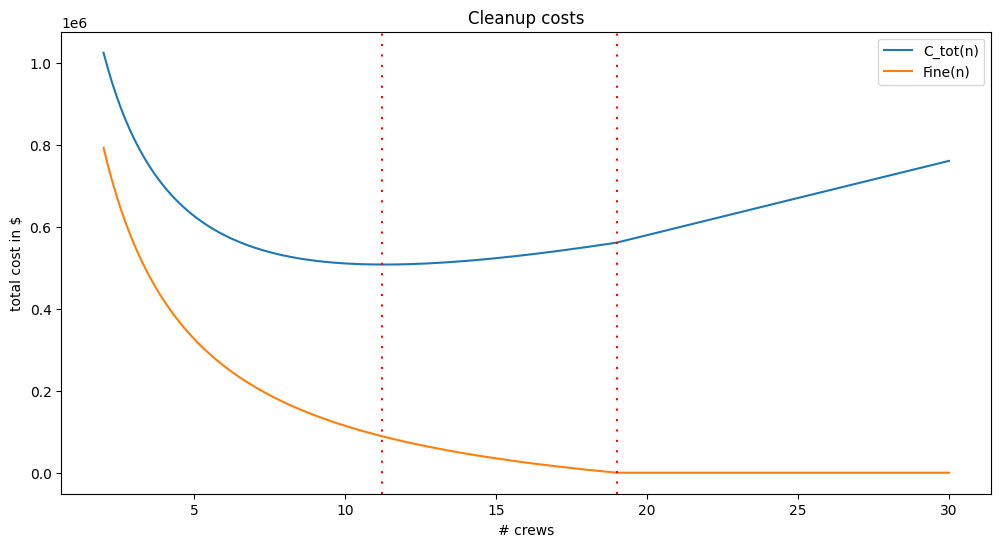

In [17]:
c = OilSpillCleanup()   ### the class with the default values

import matplotlib.pyplot as plt
import numpy as np

def create_graph(c, crew_min=2, crew_max=30, mesh=200, vlines = []):
    x = np.linspace(crew_min,crew_max,mesh)
        
    fig, ax = plt.subplots(figsize=(12,6))  
    ax.plot(x,np.array([c.cost(n) for n in x]),label="C_tot(n)")
    ax.plot(x,np.array([c.fine(c.time(n))  for n in x]),label="Fine(n)")

    ax.set_xlabel("# crews")
    ax.set_ylabel("total cost in $")
    ax.legend()

    for t in vlines:
        ax.axvline(x=t, color="red", dashes=[1,4])

    ax.set_title("Cleanup costs")
    return fig

gg=create_graph(c,vlines=[11.23,19])

## the return value of create_graph 
## in a notebook, you'll just see the graph output.
## if not in a notebook, you should now call gg.show() 
## in order to *see* the graph...


## The interval $(19,∞)$

Our computations strongly *suggest* that the costs are not minimized by
taking $n$ in the interval $(19,\infty)$. Let’s start our analysis by
confirming this fact so that we can then focus on the cost function for
$0 \le n \le 19$.

For $n \ge 19$, recall that $$C_{tot}(n) = C_{crew}(n) =
\dfrac{a}{n+1} + \dfrac{b\cdot n}{n+1} + cn$$ for constants $a,b,c$
given by $a = 500\cdot 280$, $b = 800 \cdot 280$ and $c = 18000$.

Differentiating in $n$, find that $$(\clubsuit) \quad
\dfrac{dC_{tot}}{dn} = c + \dfrac{b}{(n+1)^2} - \dfrac{a}{(n+1)^2}$$
since $\dfrac{d}{dn}\left[\dfrac{n}{n+1} \right] = \dfrac{1}{(1+n)^2}$.

For $n \ge 19$ notice that: $$\dfrac{a}{(n+1)^2} \le \dfrac{a}{20^2} =
350.$$ Since $b$ is non-negative, we see:

$$c + \dfrac{b}{n+1} - \dfrac{a}{(n+1)^2} \ge c - 350 >0.$$

This confirms - as the above graph suggests – that $C_{tot}$ is
increasing for $n \ge 19$. Thus for $n$ in $[19,\infty)$ the minimal
costs are located at the endpoint.

So to find the minimum value of the cost function $C_{\text{tot}}$ it is
enough to find the minimum value for $n$ in the interval $[0,19]$.

## The interval $[0,19]$

For $0 \le n \le 19$, the total cost function now has the form

$$C_{tot}(n) = \dfrac{a_1}{n+1} + \dfrac{b \cdot n}{n+1} + cn + d$$

where $b$ and $c$ are as before but now
$a_1 = (500 + 10000)\cdot 280 = 10500 \cdot 280$, and where the constant
$d$ is given by $d=-14\cdot 10000$.

The derivative $\dfrac{dC_{tot}}{dn}$ is still given by $(\clubsuit)$
with $a$ replaced by $a_1$.

To find critical points on the interval $(0,19)$, we solve the equation
$\dfrac{dC_{tot}}{dn} = 0$ for $n$. Clearing denominators, we find that
this amounts to solving the equation: $$0 = -a_1 + b +
c(n+1)^2$$ or $$(n+1)^2 = \dfrac{a_1 - b}{c}$$

Since $n \ge 0$ is required by the problem, the solution is
$$n= -1+\sqrt{\dfrac{a_1 - b}{c}}$$

Let’s compute this value:

In [18]:
a_1 = 10500*280
b=800*280
c=18000
-1 + np.sqrt((a_1 - b)/c)

np.float64(11.283683848458853)

Thus $C_{tot}$ has a critical point at a value slightly larger than
$n=11$.

Note that $$\dfrac{d^2 C_{tot}}{dn^2} =
\dfrac{d}{dn}\left[\dfrac{b-a}{(n+1)^2}\right] =
\dfrac{-2(b-a)}{(n+1)^3}$$

Since $b-a>0$, we find that $\dfrac{d^2 C_{tot}}{dn}$ is positive for
$n \ge 0$. Thus, the graph is concave up and the indicated critical
point is therefore a local minimum.

The computations we already made using `python` then confirm that $n=11$
minimizes the cost function (without this numerical evidence, the
minimum might have occurred at $n=12$, or at one of the endpoints $n=0$
or $n=19$).

------
# Sensitivity analysis

We are interested in describing the extent to which the solution to an
optimization problem is sensitive to the parameters.

In the case of this oil-spill problem, parameters include: 

- the length of beach that must be cleaned
- the rate of beach cleaning that a crew can achieve (miles/week)
- the travel costs per external crew
- the daily fine imposed

We want a way of measuring how “sensitive” our solution was to a given
parameter.

For instance, let’s assume that the amount of miles cleaned per week,
$m$, were not known exactly. Let’s look at the cost function again, but
regard $m$ in as an unknown parameter.

We consider the cost function for $n$ in the range in which the fine
applies (how reasonable is that assumption?!)

Viewing $m$ as a *parameter* we see that the cost function is given by

\begin{align*}
C(n) &= 500\dfrac{1400}{m(1+n)} + n \left( 18000 + 800 \dfrac{1400}{m(1+n)} \right)+ 10000\left(\dfrac{1400}{m(1+n)} - 14\right) \\
&= 18000n + 10500\dfrac{1400}{m(1+n)} + 800 \cdot 1400 \dfrac{n}{m(1+n)} - 14000
\end{align*}

Thus
$$\dfrac{dC}{dn} = 18000 - 10500 \cdot \dfrac{200}{m(1+n)^2}+ 800 \cdot 200 \dfrac{1}{m(1+n)^2}$$

We now see that $C$ has a critical point when 
$$9700 \cdot \dfrac{1400}{m} = 1800(1+n)^2 \implies n = \sqrt{\dfrac{6790}{9m}} -1.$$

So: we have described the critical point as a function of $m$!

Recall that the original value of $m$ was $5$ miles
per day.

In [19]:
def n(m): return np.sqrt(6790.0/(9*m)) - 1

n(5)

np.float64(11.283683848458853)

We find critical points for "nearby" values of $m$:

In [20]:
[(5+.1*e,n(5 + .1*e)) for e in range(-5,5)]

[(4.5, np.float64(11.948139672850859)),
 (4.6, np.float64(11.806625700618754)),
 (4.7, np.float64(11.669652503626441)),
 (4.8, np.float64(11.536982329329732)),
 (4.9, np.float64(11.408394495995603)),
 (5.0, np.float64(11.283683848458853)),
 (5.1, np.float64(11.162659381253793)),
 (5.2, np.float64(11.045143008095422)),
 (5.3, np.float64(10.930968459674354)),
 (5.4, np.float64(10.819980294246628))]

There is certainly *some* dependence on $n$, but it doesn’t seem *too*
sensitive.

If a quantity $y = y(x)$ depends on a quantity $x$, the sensitivity of
$y$ to $x$ is defined to be the relative change in $y$ brought about by
a relative change in $x$: $$\dfrac{\dfrac{\Delta
y}{y}}{\dfrac{\Delta x}{x}}= \dfrac {\dfrac{y(x+\Delta x) -
y(x)}{y(x)}}{\dfrac{\Delta x}{x}}= \dfrac{y(x+\Delta x) - y(x)}{\Delta
x} \cdot \dfrac{x}{y(x)}$$

Taking the limit as $\Delta x \to 0$, this expression becomes $$S(y,x)
= \dfrac{dy}{dx}\cdot \dfrac{x}{y}.$$

In our problem, we consider the dependence of the critical point
$n = n(m)$ on the quantity $m$. We have seen that $$n(m)\approx -1 +
\sqrt{\dfrac{6790}{9m}} = -1 + \sqrt{754.44}\cdot m^{-0.5}$$

And thus $$\dfrac{dn}{dm} = (-0.5)\sqrt{754.44}m^{-1.5}$$

Now the sensitivity $S(n,m)$ is given by 

$$S(n,m) = \dfrac{dn}{dm}
\cdot \dfrac{m}{n(m)}.$$

Let's represent this by some code:

In [22]:
import sympy as sp

def n(m):
    return -1 + np.sqrt(754.44)*m**-.5

def dn(m):
    return -0.5*np.sqrt(754.44)*m**(-1.5)

def Snm(m):
    return dn(m)*m/n(m)

Snm(5)

np.float64(-0.5443119117831824)


So e.g. when $m = 5$, we find that $$S(n,0.714) \approx
-0.5443$$

Thus a 1% change in the miles of beach cleaned per day by a crew results
in roughly one half of a % change in the optimal value of $n$.

In contrast, if we did the same calculation with the fine amount, $f$ ,
we’d obtain $S(n, f) \approx 0.561$, for $f = 10,000$. Of course, this
doesn’t sound very different, but note that while a 1% error in $m$ is
reasonable, we probably expect much larger changes in $f$ (e.g. one can
imagine regulators doubling the fine!). A 100% change in $f$ results in
about a 56% change in $n$, so our strategy is not robust to “expected”
changes in $f$.